# Project Name – Credit Card Segmentation

Problem Statement -

This case requires trainees to develop a customer segmentation to define
marketing strategy. The sample dataset summarizes the usage behaviour of about 9000
active credit card holders during the last 6 months. The file is at a customer level with
18 behavioural variables.

# Number of attributes:

1.CUST_ID Credit card holder ID

2.BALANCE Monthly average balance (based on daily balance averages)

3.BALANCE_FREQUENCY Ratio of last 12 months with balance

4.PURCHASES Total purchase amount spent during last 12 months

5.ONEOFF_PURCHASES Total amount of one-off purchases

6.INSTALLMENTS_PURCHASES Total amount of installment purchases

7.CASH_ADVANCE Total cash-advance amount

8.PURCHASES_ FREQUENCY-Frequency of purchases (percentage of months with at least on purchase)

9.ONEOFF_PURCHASES_FREQUENCY Frequency of one-off-purchases

10.PURCHASES_INSTALLMENTS_FREQUENCY Frequency of installmentpurchases

11.CASH_ADVANCE_ FREQUENCY Cash-Advance frequency

12.AVERAGE_PURCHASE_TRX Average amount per purchase transaction

13.CASH_ADVANCE_TRX Average amount per cash-advance transaction

14.PURCHASES_TRX Average amount per purchase transaction

15.CREDIT_LIMIT Credit limit

16.PAYMENTS-Total payments (due amount paid by the customer to decrease their statement balance) in the period

17.MINIMUM_PAYMENTS Total minimum payments due in the period.

18.PRC_FULL_PAYMENT- Percentage of months with full payment of the due statement balance

19.TENURE Number of months as a customer

# Observation:

From the problem statement and the input attributes we can clearly understand that this belongs to unsupervised machine learning model in which there will be no target label, every attribute has to be considered as input feature, we have to find the hidden patterns among these features and establish the hidden patterns.

Importing libraries

In [1]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

Wall time: 1.94 s


# Reading the data file

In [2]:
%%time
data=pd.read_csv("C:/Users/rkocherlakota/Desktop/ds_projects/Credit Card Segmentation/credit-card-data.csv")

Wall time: 32 ms


In [3]:
%%time
data.head()

Wall time: 0 ns


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
%%time
data.dtypes

Wall time: 0 ns


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
%%time
data.isnull().sum()

Wall time: 4 ms


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
%%time
data.shape

Wall time: 0 ns


(8950, 18)

In [7]:
%%time
data.describe().T

Wall time: 56 ms


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
%%time
data['CREDIT_LIMIT'].isnull().value_counts()

Wall time: 4 ms


False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [9]:
%%time
data['CREDIT_LIMIT'].describe()

Wall time: 4 ms


count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

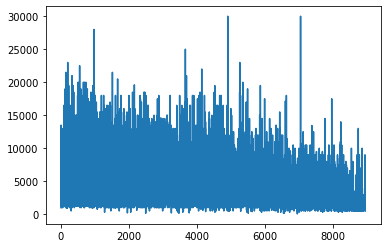

In [10]:
plt.plot(data['CREDIT_LIMIT'])


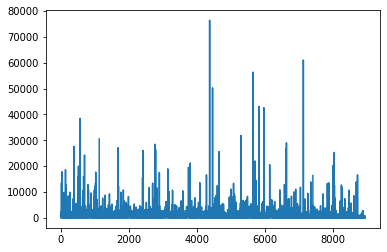

In [11]:
plt.plot(data['MINIMUM_PAYMENTS'])

Observation:
    
    From the graph we can see that therre are some outlier data in the distribution "CREDIT_LIMIT" and "MINIMUM_PAYMENTS" column and also we don't want any data to be lost in this dataset and hence we will fill the null values with median imputaion rather than mean imputation.
    This is because mean can't give the measure of central tendency if there is any outler data available in the data distribution.

In [12]:
%%time
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

Wall time: 0 ns


In [13]:
%%time
data.isnull().sum()

Wall time: 4 ms


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Deriving Key Performance Indicators(KPI)

Averages of monthly purchases and monthly cash advance

In [14]:
%%time
data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']
data['Monthly_avg_purchase'].head()

Wall time: 20 ms


0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [15]:
%%time
data['Monthly_cash_advance'].head()

Wall time: 0 ns


0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [16]:
%%time
data[data['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

Wall time: 4 ms


4302

# Purchase_type

To find what type of purchases customers are making on credit card,lets explore the data.

In [17]:
%%time
#For customers who do only one-off purchases
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

Wall time: 4 ms


(1874, 20)

In [18]:
%%time
#For customers who do only installment purchases
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

Wall time: 0 ns


(2260, 20)

In [19]:
%%time
#For the customers who do both one-off purchases and installment purchases
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

Wall time: 4 ms


(2774, 20)

In [20]:
%%time
#For the customers neither do one-off purchases nor installment purchases
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

Wall time: 0 ns


(2042, 20)

# Observations:
    We can see that there are four types of customers in the entire dataset, they are 
    1. Customers who do only oneoff_purchase transactions
    2. Customers who do only installment purchase transaction
    3. Customers who do both oneoff_purchase and installment purchase transactions
    4. Customers who neither do oneoff_purchase transactions nor installment purchase transactions.

In [21]:
%%time
#Writing a function for all the transaction types
def transaction(data):  
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'installment'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
         return 'both'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'none'

Wall time: 0 ns


In [22]:
%%time
#Creating label type for the transaction types
data['transaction_type']=data.apply(transaction,axis=1)
data['transaction_type'].value_counts()

Wall time: 746 ms


both           2774
installment    2260
none           2042
one_off        1874
Name: transaction_type, dtype: int64

In [23]:
%%time
#Finding the limit usage for each customer
data['limit_usage']=data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
data['limit_usage'].head()

Wall time: 342 ms


0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [24]:
%%time
#finding Payment to minimum payments Ratio
data['payment_minpay']=data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
data['payment_minpay'].describe().T

Wall time: 292 ms


count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

# Observations:
    From the above description of various variables we can see that there is high variance of the values and this leads to the skewness of the data.Hence to avoid this we will be applying log transformation on all the variables present in the dataset, this solves the problem of skewness.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [26]:
# log tranformation
transform=data.drop(['CUST_ID','transaction_type'],axis=1).applymap(lambda x: np.log(x+1))

In [27]:
transform.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


In [28]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
transform_pre=transform[[x for x in transform.columns if x not in col ]]

In [29]:
transform_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.0,0.635989,0.693147,0.693147,0.693147
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.0,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.0,0.000000,4.499810,6.151961,10.021315
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.0,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.0,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.0,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.0,0.000000,0.000000,0.200671,0.916291
CASH_ADVANCE_TRX,8950.0,0.817570,1.009316,0.0,0.000000,0.000000,1.609438,4.820282
PURCHASES_TRX,8950.0,1.894731,1.373856,0.0,0.693147,2.079442,2.890372,5.883322
Monthly_avg_purchase,8950.0,3.050877,2.002823,0.0,1.481458,3.494587,4.587295,8.315721


# Finding the insights from the data

In [30]:
data[data['transaction_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,transaction_type,limit_usage,payment_minpay


In [31]:
# Average payment_minpayment ratio for each purchse type.
x=data.groupby('transaction_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 0, 'minimum payment')

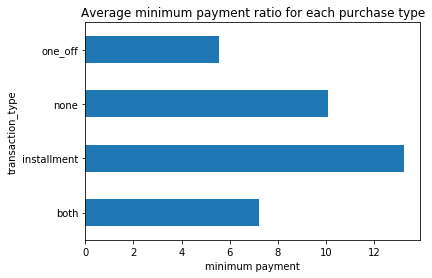

In [32]:
data.groupby('transaction_type').apply(lambda x: np.mean(x['payment_minpay'])).plot.barh()
plt.title('Average minimum payment ratio for each purchase type')
plt.xlabel('minimum payment')

1. Customers who make transactions in installments are paying the amount regularly

Text(0.5, 0, 'monthly cash advance')

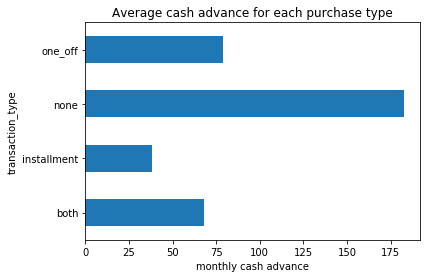

In [33]:
data.groupby('transaction_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance for each purchase type')
plt.xlabel('monthly cash advance')

2.Customers neither make a transaction in one_off payments nor installments are having high monthly cash advances

Text(0.5, 0, 'limit usage')

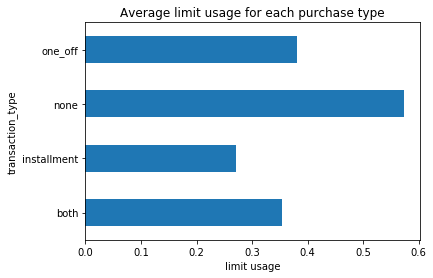

In [34]:
data.groupby('transaction_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()
plt.title('Average limit usage for each purchase type')
plt.xlabel('limit usage')

3.Less limit usage gives high credit score and the good score is with the customers who make transactions in installments

# Dataset Preparations for model selection

In [35]:
data_original=pd.concat([data,pd.get_dummies(data['transaction_type'])],axis=1)

In [36]:
data_original.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [37]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,transaction_type,limit_usage,payment_minpay
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075


In [38]:
transform_pre['transaction_type']=data.loc[:,'transaction_type']

C:\Users\rkocherlakota\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
transform_pre.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,transaction_type
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off


In [40]:
df_dummy=pd.concat([transform_pre,pd.get_dummies(transform_pre['transaction_type'])],axis=1)
df_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,transaction_type,both,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1


In [41]:
df_dummy=df_dummy.drop(['transaction_type'],axis=1)

In [42]:
df_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


In [43]:
df_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.0,0.635989,0.693147,0.693147,0.693147
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.0,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.0,0.000000,4.499810,6.151961,10.021315
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.0,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.0,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.0,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.0,0.000000,0.000000,0.200671,0.916291
CASH_ADVANCE_TRX,8950.0,0.817570,1.009316,0.0,0.000000,0.000000,1.609438,4.820282
PURCHASES_TRX,8950.0,1.894731,1.373856,0.0,0.693147,2.079442,2.890372,5.883322
Monthly_avg_purchase,8950.0,3.050877,2.002823,0.0,1.481458,3.494587,4.587295,8.315721


Finding the correlation among the variables in dataset

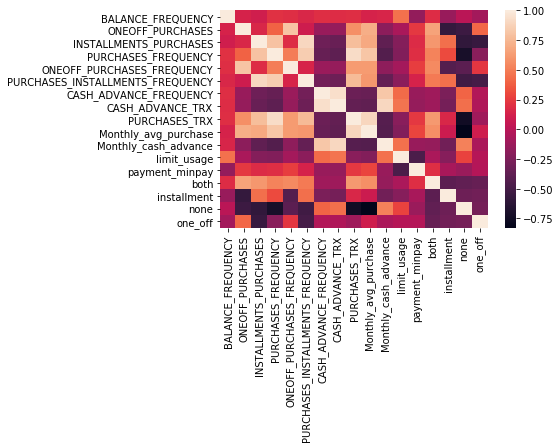

In [44]:
sns.heatmap(df_dummy.corr())

# Observations:
    The variables available for the model selection are very high in this dataset and this leads to dimensionality curse. In order to reduce the high dimensionality curse we use Principal Component Analysis technique, but before we use this we must make sure that the data available in the dataset have no weightage issues. So we use standard scaler technique if there are any weightage issues among the variables of the dataset.

Choosing PCA model

In [45]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df_dummy)

In [46]:
from sklearn.decomposition import PCA
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [47]:
type(df_pca)

sklearn.decomposition._pca.PCA

In [48]:
var_ratio

{4: 0.8115442762351265,
 5: 0.8770555795291433,
 6: 0.9186492443512618,
 7: 0.9410925256030129,
 8: 0.961611405368306,
 9: 0.9739787081990647,
 10: 0.9835896584630711,
 11: 0.9897248107341953,
 12: 0.9927550009135223,
 13: 0.9953907562385427,
 14: 0.9979616898169593}

Observation:
    From the above variance ratio we can see that the maximum variance is available when the number of components are 5. Hence we choose n_components as 5 to reduce the dimensionality in the datset.

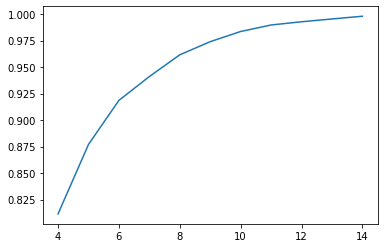

In [49]:
pd.Series(var_ratio).plot()

In [50]:
df_scaled.shape

(8950, 17)

In [51]:
pc_final=PCA(n_components=5).fit(df_scaled)
reduced_df=pc_final.fit_transform(df_scaled)

In [52]:
df1=pd.DataFrame(reduced_df)
df1.head()

,0,1,2,3,4
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929
2,1.287396,1.508938,2.709966,-1.892252,0.010809
3,-1.047613,0.673103,2.501794,-1.306784,0.761348
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969


In [53]:
df1.shape

(8950, 5)

In [54]:
col_list=df_dummy.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay', 'both',
       'installment', 'none', 'one_off'],
      dtype='object')

In [55]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [56]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

# Model Selection

In [57]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=42)
km_4.fit(reduced_df)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [58]:
pd.Series(km_4.labels_).value_counts()

2    2758
0    2228
1    2090
3    1874
dtype: int64

Wall time: 100 ms


Text(0.5, 1.0, 'Clustering when number of components=4')

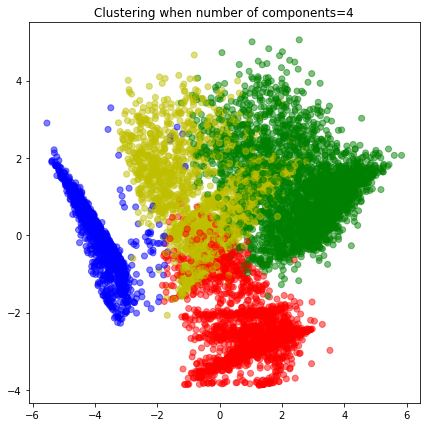

In [59]:
%%time
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)
plt.title('Clustering when number of components=4')

Wall time: 4.9 s


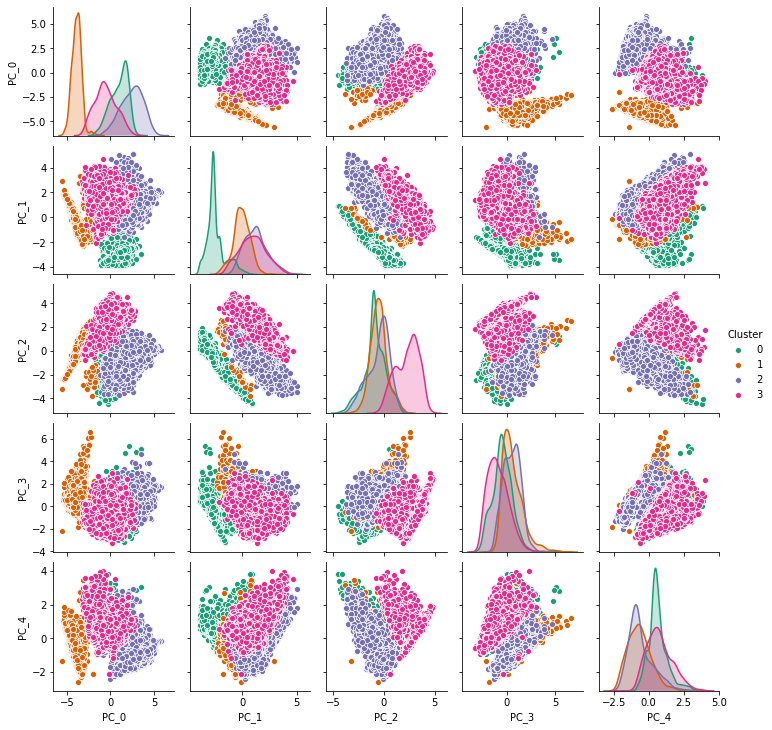

In [60]:
%%time
df_pair_plot=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(5)])
df_pair_plot['Cluster']=km_4.labels_
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',height=2)

# Observations:
    From the above graphs we can conclude that the only PC_0 and PC_1 are identifiable clusters and hence we go with further analysis by increasding the number of clusters value to identify more number of insights about the customers present in the dataset.

In [61]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both','installment','one_off','none','CREDIT_LIMIT']

In [62]:
transform_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.0,0.635989,0.693147,0.693147,0.693147
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.0,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.0,0.000000,4.499810,6.151961,10.021315
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.0,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.0,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.0,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.0,0.000000,0.000000,0.200671,0.916291
CASH_ADVANCE_TRX,8950.0,0.817570,1.009316,0.0,0.000000,0.000000,1.609438,4.820282
PURCHASES_TRX,8950.0,1.894731,1.373856,0.0,0.693147,2.079442,2.890372,5.883322
Monthly_avg_purchase,8950.0,3.050877,2.002823,0.0,1.481458,3.494587,4.587295,8.315721


In [63]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([data_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [64]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.053860,0.045933,33.125453,7.118997
Monthly_avg_purchase,47.573598,0.159337,193.696083,69.758276
Monthly_cash_advance,33.489846,186.298043,67.620006,77.843485
limit_usage,0.264275,0.576217,0.354487,0.378727
CASH_ADVANCE_TRX,1.019300,6.552632,2.807107,2.864995
payment_minpay,13.402660,9.927979,7.268605,5.561421
both,0.001795,0.002392,1.000000,0.003735
installment,0.998205,0.017225,0.000000,0.000000
one_off,0.000000,0.003349,0.000000,0.996265
none,0.000000,0.977033,0.000000,0.000000


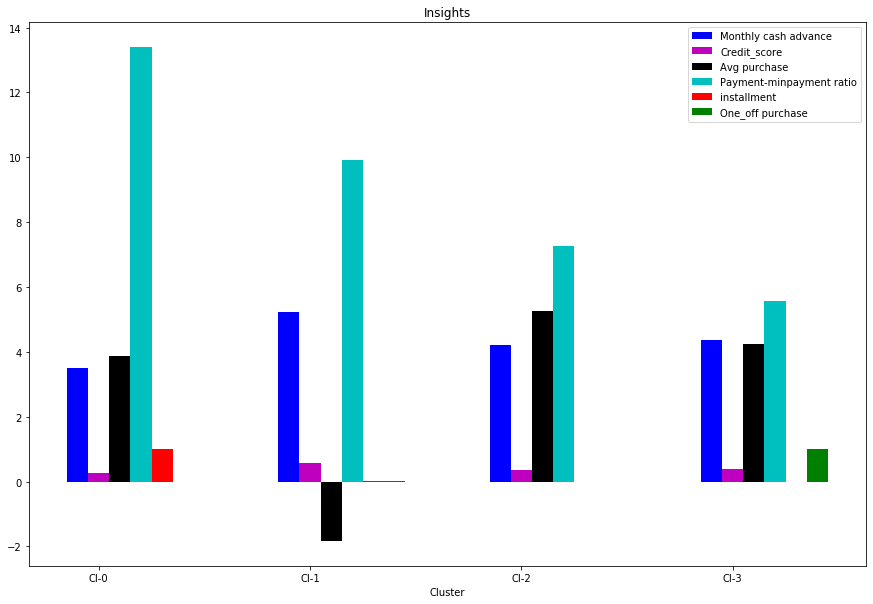

In [65]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

Observations:
    From the above graph we can see that the four clusters have been categorised perfectly so that the difference in each cluster can be understood

In [66]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s)

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ")
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2228
1          1    2090
2          2    2758
3          3    1874
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2228   24.893855
1  2090   23.351955
2  2758   30.815642
3  1874   20.938547


# Exploring the insights if the number of cluster=5

In [67]:
#kmeans with 5 clusters
km_5=KMeans(n_clusters=5,random_state=42)
km_5=km_5.fit(reduced_df)
km_5.labels_

array([0, 3, 4, ..., 0, 3, 4])

Text(0, 0.5, 'PC_1')

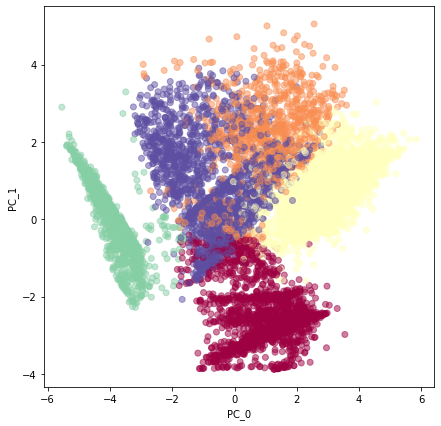

In [68]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [69]:
cluster_df_5=pd.concat([data_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [70]:
# Finding Mean of features for each cluster
five_cluster=cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

five_cluster

Cluster_5,0,1,2,3,4
PURCHASES_TRX,11.896714,27.536476,34.538035,0.035509,7.067742
Monthly_avg_purchase,47.239695,141.648931,209.814279,0.096572,68.685725
Monthly_cash_advance,19.154845,252.400192,3.996969,185.109488,73.635703
limit_usage,0.246825,0.594982,0.262694,0.576260,0.377563
CASH_ADVANCE_TRX,0.480282,10.519641,0.152645,6.454894,2.648387
payment_minpay,13.866212,3.920172,8.569707,9.950170,5.540102
both,0.000000,0.878788,1.000000,0.000000,0.003226
installment,1.000000,0.106622,0.000000,0.016795,0.000000
one_off,0.000000,0.014590,0.000000,0.003359,0.996774
none,0.000000,0.000000,0.000000,0.979846,0.000000


In [71]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print(s1)

Cluster_5   
0          0    2130
1          1     891
2          2    1985
3          3    2084
4          4    1860
Name: Cluster_5, dtype: int64


([<matplotlib.axis.XTick at 0x1fd1dc3b948>,
 <a list of 5 Text xticklabel objects>)

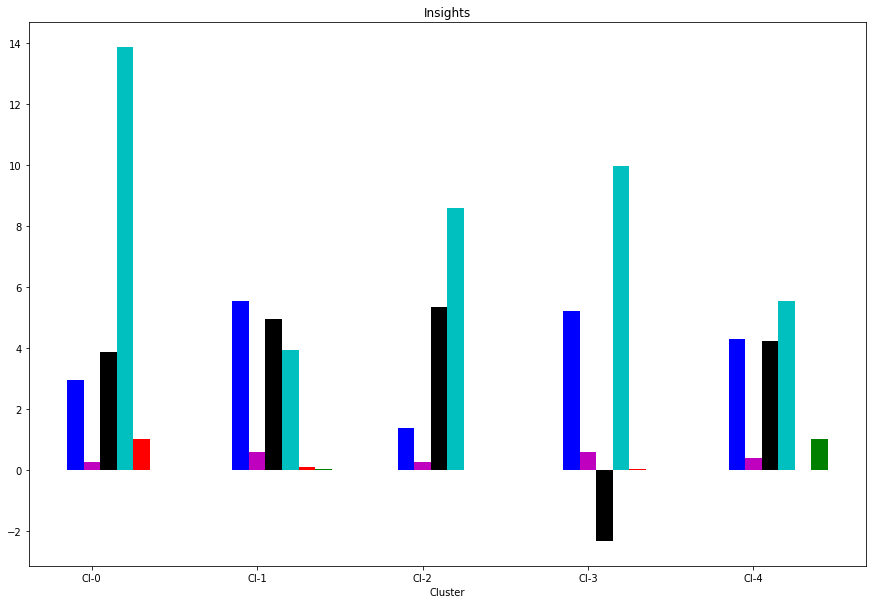

In [72]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(five_cluster.columns))

cash_advance=np.log(five_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(five_cluster.loc['limit_usage',:].values)
purchase= np.log(five_cluster.loc['Monthly_avg_purchase',:].values)
payment=five_cluster.loc['payment_minpay',:].values
installment=five_cluster.loc['installment',:].values
one_off=five_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))

Observations: 
From the above graph, we can't come to a particular conclusion regarding the behaviour of customer groups, because cluster 2 is having highest average purchases in the transactions, but at the same time cluster1 has highest cash advance and second highest purchases.

In [73]:
# percentage of each cluster
print("Cluster-5")
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  2130   23.798883
1   891    9.955307
2  1985   22.178771
3  2084   23.284916
4  1860   20.782123


# Exploring the insights when number of clusters=6

In [74]:
km_6=KMeans(n_clusters=6).fit(reduced_df)
km_6.labels_

array([0, 2, 3, ..., 0, 2, 5])

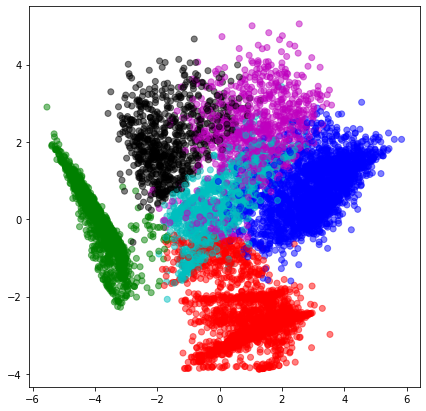

In [75]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [76]:
cluster_df_6=pd.concat([data_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [77]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.896762,34.653320,0.033205,7.748735,27.742922,5.971388
Monthly_avg_purchase,47.243825,210.512330,0.098395,78.450604,140.643565,54.099042
Monthly_cash_advance,19.155048,3.942946,184.912834,3.669832,243.934772,205.662979
limit_usage,0.246733,0.262170,0.575884,0.245107,0.595784,0.606579
CASH_ADVANCE_TRX,0.484280,0.149012,6.435034,0.131535,10.057758,7.642346
payment_minpay,13.861937,8.610468,9.967837,6.893503,3.835641,3.255430
both,0.000000,1.000000,0.000000,0.009275,0.894677,0.000000
installment,1.000000,0.000000,0.017324,0.000000,0.105323,0.000000
one_off,0.000000,0.000000,0.000000,0.990725,0.000000,1.000000
none,0.000000,0.000000,0.982676,0.000000,0.000000,0.000000


([<matplotlib.axis.XTick at 0x1fd1dcf6b88>,
 <a list of 6 Text xticklabel objects>)

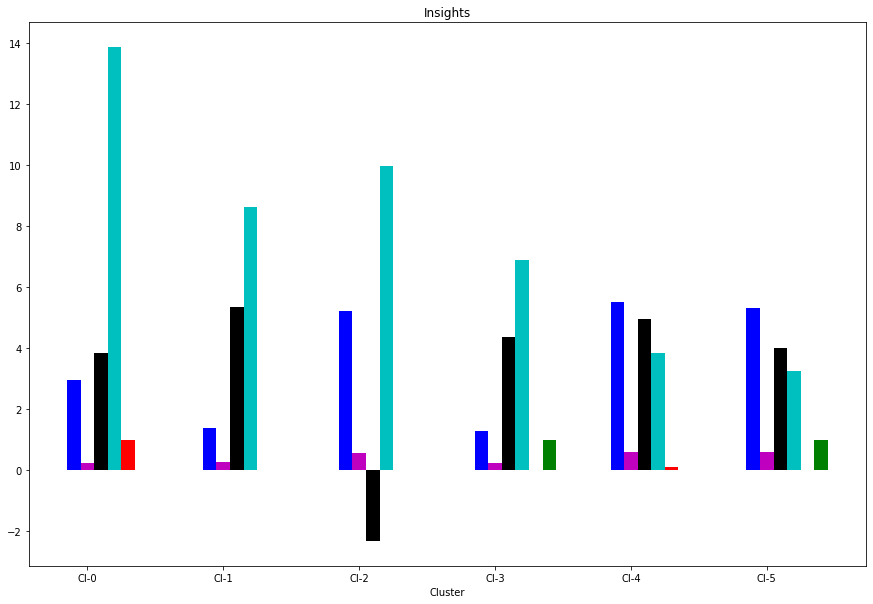

In [78]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))


Observations:
    From the above graph we can see that cluster 2 and cluster 4 have similar behavior regarding the parameters, hence distinguishing between the clusters is hard when we have the number of clusters as 6

In [79]:
cash_advance=np.log(six_cluster.iloc[2,:].values)
credit_score=list(six_cluster.iloc[3,:].values)
print(cash_advance)
print(credit_score)

[2.95256629 1.37192804 5.21988454 1.30014588 5.49690086 5.32623881]
[0.24673287577047076, 0.26216962861657617, 0.5758841059122126, 0.24510688195597208, 0.5957844119450174, 0.6065787726196032]


# Metrics for the KMeans Model

In [80]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_df)
    score_c[n]=calinski_harabasz_score(reduced_df,km_score.labels_)
    score[n]=silhouette_score(reduced_df,km_score.labels_)

In [81]:
print(score)

{3: 0.37205158824880247, 4: 0.4592585517598702, 5: 0.4557517692880192, 6: 0.4503380987246348, 7: 0.4466156966013662, 8: 0.4273668372107355, 9: 0.38205284064962847}


Text(0.5, 1.0, 'silhouette_score')

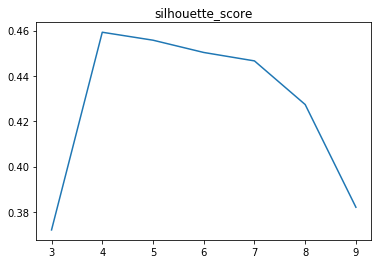

In [82]:
pd.Series(score).plot()
plt.title('silhouette_score')

In [83]:
print(score_c)

{3: 4781.990528057303, 4: 6164.054484808736, 5: 5867.020860918617, 6: 5669.497745948761, 7: 5453.119673289323, 8: 5182.893849732093, 9: 5047.451875054875}


Text(0.5, 1.0, 'calinski_harabasz_score')

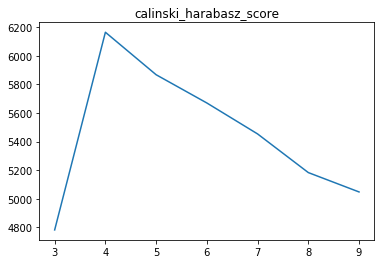

In [84]:
pd.Series(score_c).plot()
plt.title('calinski_harabasz_score')

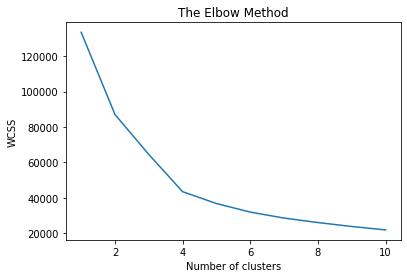

In [85]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Observations:
    From all the above graphs we can conclude the performance of the KMeans Model regarding the explanation of data distribution and measure of spread is highest when we consider the number of cluster as four.

# Final KMeans Model

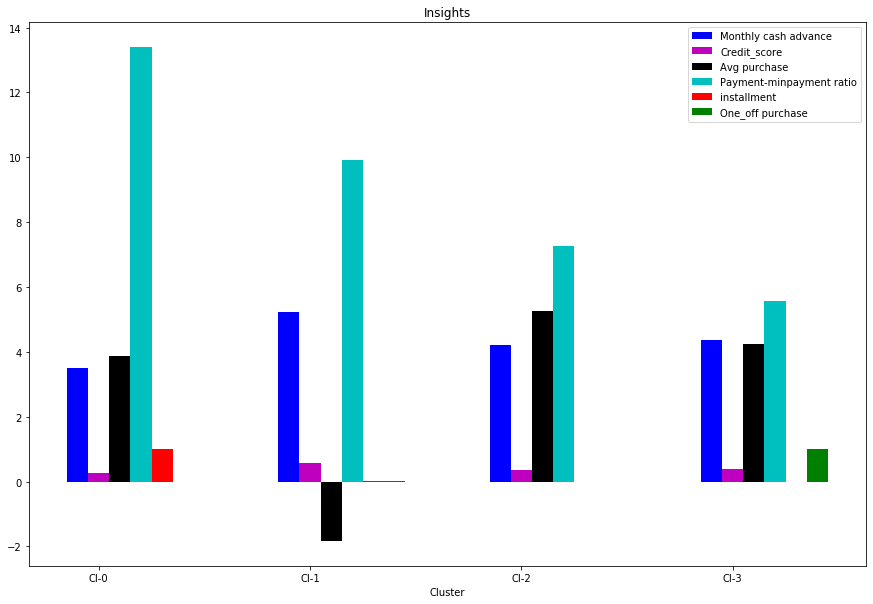

In [86]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

# Marketing Strategies

# Cluster 0:
    Customers who fall under this category of cluster are having the best credit card and also paying the dues on time without defaults. Hence these group of customers must rewarded with reward points and thus make them do more transactions in future.


# Cluster1:
    Customers belong to this category of cluster having the highest cash advance and poor credit score yet these customers pay the due amounts of the installments on time.Hence these customers may be given with the loan amounts at less interest charges, thus help the banks providing continuous services to these group of customers in future

# Cluster2:
    Customers belong to this cluster must be the primary focus regarding the marketing strategy because the customers under this cluster are making frequent purchases and also paying the dues on time thus maintaining good credit score. Customers in this cluster must be given with good reward points and provided with increased credit limit or the premium credit cards with some exciting offers make them do more transactions in the future.

# Cluster3:
    Customers belong to this cluster has the least minimum payment ratio and always does the one off payment transactions, hence no bank offers can excite these kind of cutomers. The marketing to this group of customers is hard and when the usage  is minimum, this group can be ignored from the marketing strategy.Further the customers falling under this category can be rejected from issuing the credit cards in future.